In [8]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]
graph_builder= StateGraph(State)

In [9]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="llama3-70b-8192")
llm.invoke('Hi')

AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.074644855, 'prompt_time': 0.000139237, 'queue_time': 0.093294935, 'total_time': 0.074784092}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--ea704c02-e504-42fd-a901-ee3208f64833-0', usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37})

In [10]:
def chatbot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}
graph_builder.add_node("chatbot",chatbot)

In [11]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [12]:
graph = graph_builder.compile()

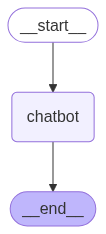

In [14]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [17]:
def stream(user_input:str):
    for event in graph.stream({"messages":[{"role":"user","content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ['quit', 'exit']:
            print("Goodbye")
            break
        stream(user_input)
    except:
        user_input="What is a node?"
        print("User:" + user_input)
        stream(user_input)
        break

Assistant: I'm happy to chat with you! However, I didn't receive any specific topic or question from you. Would you like to:

1. Ask me a question on a particular topic?
2. Discuss a random topic?
3. Play a game like 20 Questions or Hangman?
4. Generate a random conversation starter?

Let me know, and I'll do my best to assist you!
Assistant: In computer science, a node can refer to different concepts depending on the context. Here are a few common meanings of a node:

1. **Graph theory**: In graph theory, a node (also called a vertex) is a point in a graph that represents a connection or a junction. It is a fundamental component of a graph, and it can be connected to other nodes through edges. Nodes can have properties such as labels, weights, or attributes associated with them.
2. **Network topology**: In network topology, a node refers to a device or a connection point in a network. It can be a computer, a router, a switch, or any other device that is connected to a network. Nodes a

In [ ]:
#importing tools in langgraph
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=2)
tools = [tool]
tool.invoke("What is a 'node in LangGraph?")

{'query': "What is a 'node in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://medium.com/@vivekvjnk/langgraph-basics-understanding-state-schema-nodes-and-edges-77f2fd17cae5',
   'title': 'LangGraph Basics: Understanding State, Schema, Nodes, and Edges',
   'content': 'LangGraph Basics: Understanding State, Schema, Nodes, and Edges | by Story_Teller | Medium LangGraph Basics: Understanding State, Schema, Nodes, and Edges LangGraph Basics: Understanding State, Schema, Nodes, and Edges These predefined structures in the messaging app are synonymous with the schema of the state in LangGraph. Just as a messaging app ensures all interactions (messages) follow a consistent format, the schema in LangGraph ensures the state passed along edges is structured and interpretable. This static schema allows nodes to rely on a consistent state format, ensuring seamless communication along edges throughout the graph. In this article, we explored t

In [23]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name="llama3-70b-8192")
llm.invoke("hi")

AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.07465402, 'prompt_time': 0.000137647, 'queue_time': 0.096404096, 'total_time': 0.074791667}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--cda77dba-e9f6-4b71-b99a-dc730223dfae-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})

In [29]:
#creating a stategraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition 

class State(TypedDict):
    messages: Annotated[list, add_messages]
graph_builder = StateGraph(State)

llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": llm_with_tools.invoke(state["messages"])}

graph_builder.add_node("chatbot",chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)

graph_builder.add_edge("tools","chatbot")
graph_builder.add_edge(START,"chatbot")
graph = graph_builder.compile()



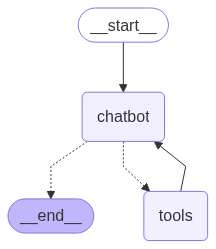

In [30]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


In [1]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages":[{"role":"user", "contract": user_input}]}):
        for value in event.values():
            print("Assistant", value["message"[-1].content])
while True:
    try:
        user_input = input("User:")
        if user_input.lower() in ["quit", "end"]:
            print("Goodbye")
            break
    except:
        user_input = "hi"
        print("user:"+ user_input)
        stream_graph_updates(user_input)
        break


Goodbye
